# Trip Advisor Hotel Reviews


## Importing Required Libraries 

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string
import re
import nltk

from tqdm import trange
from nltk import tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.probability import FreqDist
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer

import string
from wordcloud import WordCloud
from textblob import TextBlob
from collections import defaultdict
from nltk.tokenize import word_tokenize
from nltk import ngrams
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from gensim import corpora, models
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [22]:
import nltk

# Set the data path to the location of the downloaded data files
nltk.data.path.append('C:\\Users\\susan/nltk_data')

# Now you can use NLTK functions without encountering the error


In [2]:
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Error loading wordnet: <urlopen error [WinError 10060] A
[nltk_data]     connection attempt failed because the connected party
[nltk_data]     did not properly respond after a period of time, or
[nltk_data]     established connection failed because connected host
[nltk_data]     has failed to respond>
[nltk_data] Error loading punkt: <urlopen error [WinError 10060] A
[nltk_data]     connection attempt failed because the connected party
[nltk_data]     did not properly respond after a period of time, or
[nltk_data]     established connection failed because connected host
[nltk_data]     has failed to respond>


False

In [5]:
import nltk
nltk.download('wordnet')

[nltk_data] Error loading wordnet: <urlopen error [WinError 10060] A
[nltk_data]     connection attempt failed because the connected party
[nltk_data]     did not properly respond after a period of time, or
[nltk_data]     established connection failed because connected host
[nltk_data]     has failed to respond>


False

## Importing the dataset 

In [37]:
data = pd.read_csv('E:/1 task/tripadvisor_hotel_reviews.csv')
data.head(10)

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5
5,love monaco staff husband stayed hotel crazy w...,5
6,"cozy stay rainy city, husband spent 7 nights m...",5
7,"excellent staff, housekeeping quality hotel ch...",4
8,"hotel stayed hotel monaco cruise, rooms genero...",5
9,excellent stayed hotel monaco past w/e delight...,5


In [38]:
# Counting the number of ratings in the dataset

data['Rating'].value_counts()

5    9054
4    6039
3    2184
2    1793
1    1421
Name: Rating, dtype: int64

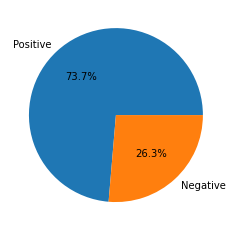

In [8]:
# Numberting the rating 4, 5 as Positive and 1, 2, 3 as Negative

def ratings(rating):
    if rating>3 and rating<=5:
        return "Positive"
    if rating>0 and rating<=3:
        return "Negative"

#Piechart
data['Rating'] = data['Rating'].apply(ratings)
plt.pie(data['Rating'].value_counts(), labels=data['Rating'].unique().tolist(), autopct='%1.1f%%')
plt.show()

## Data Pre Processing

Pre processing the data to remove noise and irrelevant information.

The preprocessing includes: count, rating variable, removing punctuation, lowercase, stopwords, tokenization, stemming

### Removing punctuations

In [39]:
#function for removing the punctuations
def remove_punctuation(text):
    punctuationfree="".join([i for i in text if i not in string.punctuation])
    return punctuationfree

In [40]:
data['Review']= data['Review'].apply(lambda x:remove_punctuation(x))
data.head()

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4 experience hotel monaco seatt...,3
3,unique great stay wonderful time hotel monaco ...,5
4,great stay great stay went seahawk game awesom...,5


### Lower casing

In [41]:
data['Review']= data['Review'].apply(lambda x: x.lower())
data.head()

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4 experience hotel monaco seatt...,3
3,unique great stay wonderful time hotel monaco ...,5
4,great stay great stay went seahawk game awesom...,5


### Tokenization

In [42]:
data['Review']= data['Review'].astype(str)


In [43]:
def tokenize_review(review):
    tokens = word_tokenize(review)
    return tokens



In [44]:
import nltk

# Set the data path to the location of the downloaded data files
nltk.data.path.append('C:\\Users\\susan\\anaconda3\\lib\\nltk_data')

# Now you can use NLTK functions without encountering the error


In [45]:
data['tokens'] = data['Review'].apply(tokenize_review)
data.head()

LookupError: 
**********************************************************************
  Resource [93mpunkt[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt/english.pickle[0m

  Searched in:
    - 'C:\\Users\\susan/nltk_data'
    - 'C:\\Users\\susan\\anaconda3\\nltk_data'
    - 'C:\\Users\\susan\\anaconda3\\share\\nltk_data'
    - 'C:\\Users\\susan\\anaconda3\\lib\\nltk_data'
    - 'C:\\Users\\susan\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
    - 'C:\\Users\\susan/nltk_data'
    - 'C:\\Users\\susan/nltk_data'
    - 'C:\\Users\\susan/nltk_data'
    - 'C:\\nltk_data'
    - 'C:\\Users\\susan\\AppData\\Roaming\\nltk_data'
    - 'C:\\Users\\susan\\anaconda3\\lib\\nltk_data'
    - 'C:\\Users\\susan\\anaconda3\\lib\\nltk_data'
    - ''
**********************************************************************


### Removing Stopwords

In [15]:
stopwords = nltk.corpus.stopwords.words('english')

In [16]:
#function for removing stopwords
def remove_stopwords(text):
    output= [i for i in text if i not in stopwords]
    return output

In [17]:
data['tokens']= data['tokens'].apply(lambda x:remove_stopwords(x))
data.head()

KeyError: 'tokens'

### Stemming

<p>It is also known as the text standardization step where the words are stemmed or diminished to their root/base form.</p>  
<p>For example, words like ‘programmer’, ‘programming, ‘program’ will be stemmed to ‘program’.</p>

In [18]:
porter_stemmer = PorterStemmer()
def stemming(text):
    stem_text = [porter_stemmer.stem(word) for word in text]
    return stem_text

In [19]:
data['stem']=data['tokens'].apply(lambda x: stemming(x))
data.head()

KeyError: 'tokens'

## Statistical Analysis

### Word frequency Counts 

In [ ]:
freq = {}
for i in df['lemmatize']:
    for j in i:
        if j not in freq:
            freq[j] = 1
        else:
            freq[j] += 1

In [ ]:
list(freq.items())[:25]

In [ ]:
freq_df=pd.DataFrame(sorted(freq.items(),key=lambda x:x[1],reverse=True))

In [ ]:
f1=freq_df[0][:10]
f2=freq_df[1][:10]

In [34]:
# This gives the most frequently used words


plt.figure(1,figsize=(16,4))
plt.bar(f1,f2,color ='blue',width = 0.4)
plt.xlabel("Words in the dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in the dataframe")
plt.savefig("wordfrequency.png")
plt.show()

NameError: name 'f1' is not defined

<Figure size 1152x288 with 0 Axes>

### n-grams

In natural language processing (NLP), an n-gram is a contiguous sequence of n items from a given sequence of text. These items can be characters, words, or even sentences.

In [ ]:
def generate_N_grams(text,n=1):
  my_ngrams = ngrams(text.split(), n)
  return my_ngrams

# We can change the value of 'n' for the corresponding n-gram analysis we want.

In [ ]:
ngram = defaultdict(int)
for text in df.Review:
  for word in generate_N_grams(text,2):
    i = word[0]+' '+word[1]
    ngram[i]+=1

In [ ]:
ngram=pd.DataFrame(sorted(ngram.items(),key=lambda x:x[1],reverse=True))

In [ ]:
d1=ngram[0][:10]
d2=ngram[1][:10]


In [35]:
plt.figure(1,figsize=(16,4))
plt.bar(d1,d2,color ='green',width = 0.4)
plt.xlabel("Words in the dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in the dataframe-BIGRAM ANALYSIS")
plt.savefig("bigram_analysis.png")
plt.show()


# We should remove the stopwords for better analysis of the n-grams appart from "did'nt" and 'did not', 
#'great location' and 'staff friendly' are the most used ngrams in the reviews.

NameError: name 'd1' is not defined

<Figure size 1152x288 with 0 Axes>

### Sentimental Analysis